<a href="https://colab.research.google.com/github/rhearjethvani/MITFutureMakers/blob/main/mnistNeuralNetwork/mnistNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import utils
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_drawing = x_train

image_size = 784
x_train = x_train.reshape(x_train.shape[0], image_size)
x_test = x_test.reshape(x_test.shape[0], image_size)

num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step


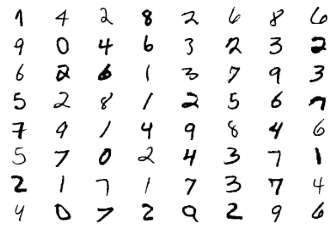

In [2]:
for i in range(64):
  ax = plt.subplot(8, 8, i+1)
  ax.axis('off')
  plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [3]:
model = Sequential()

model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


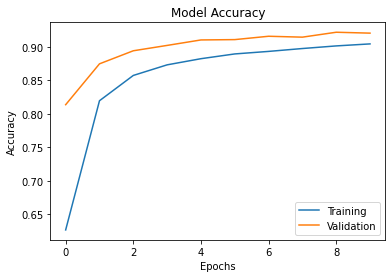

Test Loss: 0.365
Test Accuracy: 0.909


In [4]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=False, validation_split=.1)
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

print(f'Test Loss: {loss:.3}')
print(f'Test Accuracy: {accuracy:.3}')